In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Importing Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("clean_dataset.csv")

In [4]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
df.shape

(690, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,690.0,0.695652,0.460464,0.00,0.000,1.00,1.0000,1.00
Age,690.0,31.514116,11.860245,13.75,22.670,28.46,37.7075,80.25
Debt,690.0,4.758725,4.978163,0.00,1.000,2.75,7.2075,28.00
Married,690.0,0.760870,0.426862,0.00,1.000,1.00,1.0000,1.00
BankCustomer,690.0,0.763768,0.425074,0.00,1.000,1.00,1.0000,1.00
YearsEmployed,690.0,2.223406,3.346513,0.00,0.165,1.00,2.6250,28.50
PriorDefault,690.0,0.523188,0.499824,0.00,0.000,1.00,1.0000,1.00
Employed,690.0,0.427536,0.495080,0.00,0.000,0.00,1.0000,1.00
CreditScore,690.0,2.400000,4.862940,0.00,0.000,0.00,3.0000,67.00
DriversLicense,690.0,0.457971,0.498592,0.00,0.000,0.00,1.0000,1.00


In [8]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [9]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [10]:
y = df['Approved']
X = df.drop(columns = ['Approved'])

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 690, dtype: int64

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [13]:
X

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750


In [14]:
df['Industry'].unique().tolist()

['Industrials',
 'Materials',
 'CommunicationServices',
 'Transport',
 'InformationTechnology',
 'Financials',
 'Energy',
 'Real Estate',
 'Utilities',
 'ConsumerDiscretionary',
 'Education',
 'ConsumerStaples',
 'Healthcare',
 'Research']

In [15]:
df['Ethnicity'].unique().tolist()

['White', 'Black', 'Asian', 'Latino', 'Other']

In [16]:
df['Citizen'].unique().tolist()

['ByBirth', 'ByOtherMeans', 'Temporary']

In [17]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64','float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == 'object' and X[cname].nunique()< 20] 

In [18]:
numerical_cols

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'ZipCode',
 'Income']

In [19]:
categorical_cols

['Industry', 'Ethnicity', 'Citizen']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
OEncode = OrdinalEncoder()
X[categorical_cols] = OEncode.fit_transform(X[categorical_cols])

In [22]:
scaler_x = StandardScaler()
X[numerical_cols] = scaler_x.fit_transform(X[numerical_cols])

In [23]:
X

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,0.661438,-0.057723,-0.956613,0.560612,0.556146,7.0,4.0,-0.291083,0.954650,1.157144,-0.288101,-0.919195,0.0,0.123399,-0.195413
1,-1.511858,2.291317,-0.060051,0.560612,0.556146,9.0,1.0,0.244190,0.954650,1.157144,0.740830,-0.919195,0.0,-0.791213,-0.087852
2,-1.511858,-0.591826,-0.856102,0.560612,0.556146,9.0,1.0,-0.216324,0.954650,-0.864196,-0.493887,-0.919195,0.0,0.572076,-0.037144
3,0.661438,-0.310853,-0.647038,0.560612,0.556146,7.0,4.0,0.456505,0.954650,1.157144,0.535044,1.087908,0.0,-0.463333,-0.194837
4,0.661438,-0.957176,0.174141,0.560612,0.556146,7.0,4.0,-0.153526,0.954650,-0.864196,-0.493887,-0.919195,1.0,-0.348288,-0.195413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.661438,-0.880394,1.070704,-1.783765,-1.798090,3.0,1.0,-0.291083,-1.047504,-0.864196,-0.493887,-0.919195,0.0,0.457031,-0.195413
686,-1.511858,-0.746235,-0.805846,0.560612,0.556146,4.0,4.0,-0.066806,-1.047504,1.157144,-0.082314,1.087908,0.0,0.111894,-0.119736
687,-1.511858,-0.528544,1.757198,-1.783765,-1.798090,6.0,2.0,-0.066806,-1.047504,1.157144,-0.288101,1.087908,0.0,0.111894,-0.195221
688,0.661438,-1.147023,-0.915403,0.560612,0.556146,2.0,4.0,-0.652915,-1.047504,-0.864196,-0.493887,-0.919195,0.0,0.572076,-0.051358


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((621, 15), (69, 15), (621, 2), (69, 2))

In [26]:
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(100, input_dim = 15, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(80,activation='relu'))

ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(50,activation='relu'))

ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(30,activation='relu'))

ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(10,activation='relu'))

ANN_model.add(Dropout(0.2))



# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1

In [27]:
ANN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [28]:
history = ANN_model.fit(X_train,y_train,epochs=20,validation_split=0.2,verbose=1)

Epoch 1/20
16/16 [==============================] - 2s 19ms/step - loss: 0.6935 - accuracy: 0.5222 - val_loss: 0.6866 - val_accuracy: 0.7680
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.6129 - val_loss: 0.6593 - val_accuracy: 0.6800
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6439 - accuracy: 0.6794 - val_loss: 0.5901 - val_accuracy: 0.7760
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5652 - accuracy: 0.8165 - val_loss: 0.4669 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4740 - accuracy: 0.8306 - val_loss: 0.4369 - val_accuracy: 0.8160
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.8629 - val_loss: 0.4048 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4035 - accuracy: 0.8589 - val_loss: 0.4212 - val_accuracy: 0.8240
Epoch 8/20
16/16 [=

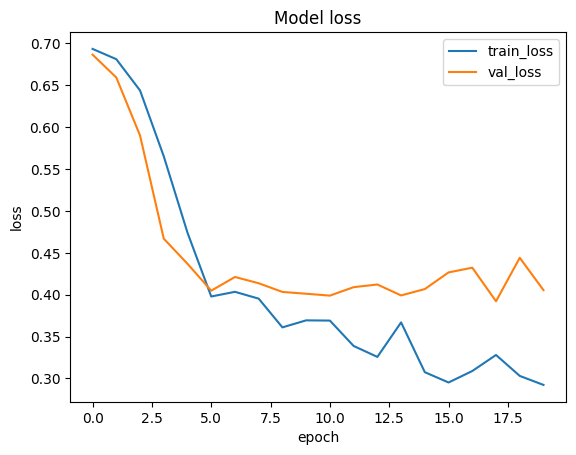

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [30]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

3/3 [==============================] - 0s 2ms/step


In [31]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

3/3 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8406
Accuracy : 0.8405796885490417


In [32]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<Axes: >

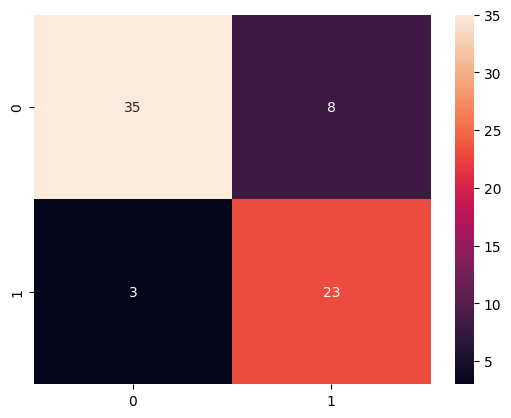

In [33]:
# Plot Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_original,predict)
sns.heatmap(confusion_matrix,annot=True)

In [34]:
confusion_matrix

array([[35,  8],
       [ 3, 23]], dtype=int64)

In [35]:
# Print out the classification report
from sklearn.metrics import classification_report
print(classification_report(y_original,predict))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.74      0.88      0.81        26

    accuracy                           0.84        69
   macro avg       0.83      0.85      0.84        69
weighted avg       0.85      0.84      0.84        69



In [36]:
result = ANN_model.predict([[0.661438,	-0.057723,	-0.956613,	0.560612,	0.556146,	7.0,	4.0,	-0.291083,	0.954650,	1.157144,	-0.288101,	-0.919195,	0.0,	0.123399,	-0.195413]])

1/1 [==============================] - 0s 97ms/step


In [ ]:
0.661438	-0.057723	-0.956613	0.560612	0.556146	7.0	4.0	-0.291083	0.954650	1.157144	-0.288101	-0.919195	0.0	0.123399	-0.195413

In [37]:
result

array([[0.02618882, 0.97381115]], dtype=float32)

In [38]:
with open('model.pkl','wb') as files:
    pickle.dump(ANN_model,files)